In [60]:
from ROOT import *
import collections


In [73]:
infile_old = TFile.Open('/usatlas/u/pusharma/usatlasdata/vhbb/stxs_uncertainity/old/out_Scale_Unc_MU_scheme2.root')
infile_new = TFile.Open('/usatlas/u/pusharma/usatlasdata/vhbb/stxs_uncertainity/vhbbstxstoolkit_run2_legacy/out_Scale_13POI_legacy_scheme2.root')

In [74]:
h_old = infile_old.Get('Scale_UNC')

In [75]:
h_new = infile_new.Get('Scale_UNC')

In [76]:
# for i in range(1,h_old.GetNbinsY()+1):
#     for j in range(1,h_old.GetNbinsX()+1):
#         bin_number_x=h_new.GetXaxis().FindBin(h_old.GetXaxis().GetBinLabel(j))
#         bin_number_y=h_new.GetYaxis().FindBin(h_old.GetYaxis().GetBinLabel(i))
#         print(h_old.GetYaxis().GetBinLabel(i),h_old.GetXaxis().GetBinLabel(j),h_old.GetBinContent(i,j),h_new.GetBinContent(bin_number_x,bin_number_y))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


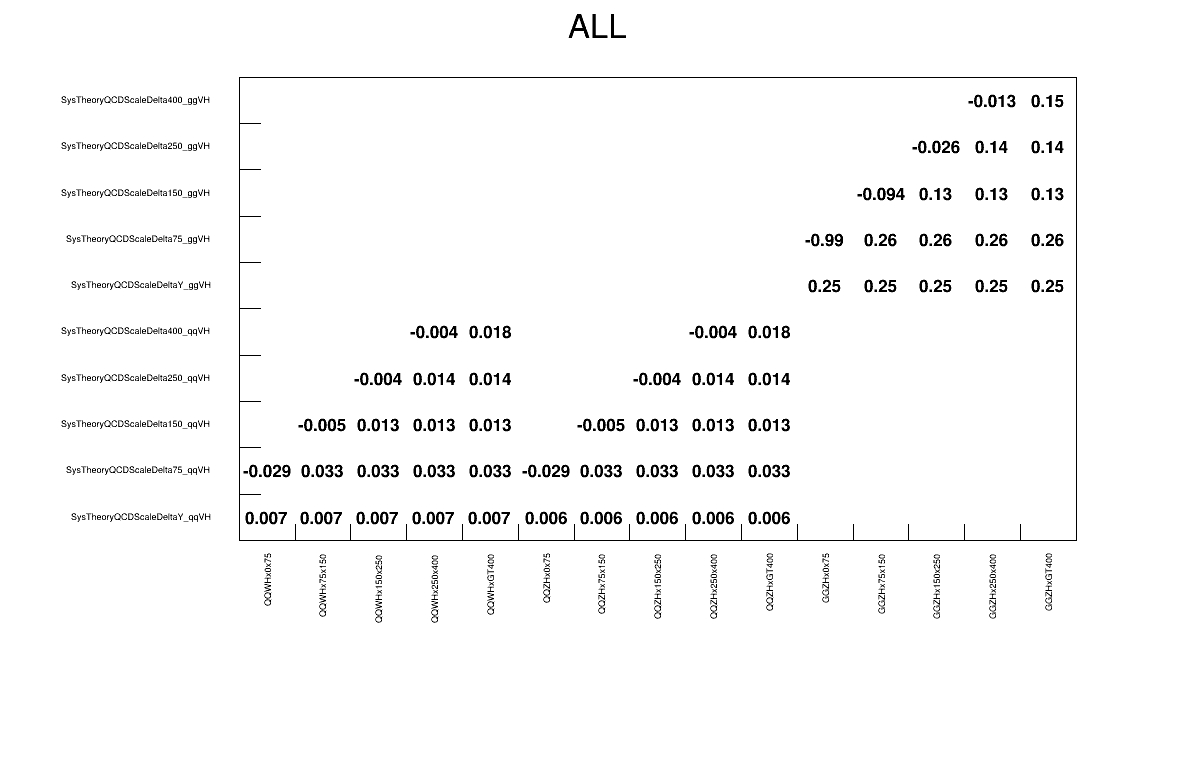

In [77]:
c1= TCanvas("c1","c1",1200,800)
c1.SetBottomMargin(0.3)
c1.SetRightMargin(-0.2)
c1.SetLeftMargin(0.2)
h_old.SetStats(0)
h_old.GetXaxis().SetLabelSize(0.02)
h_old.GetYaxis().SetLabelSize(0.02)
h_old.Draw("TEXT")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


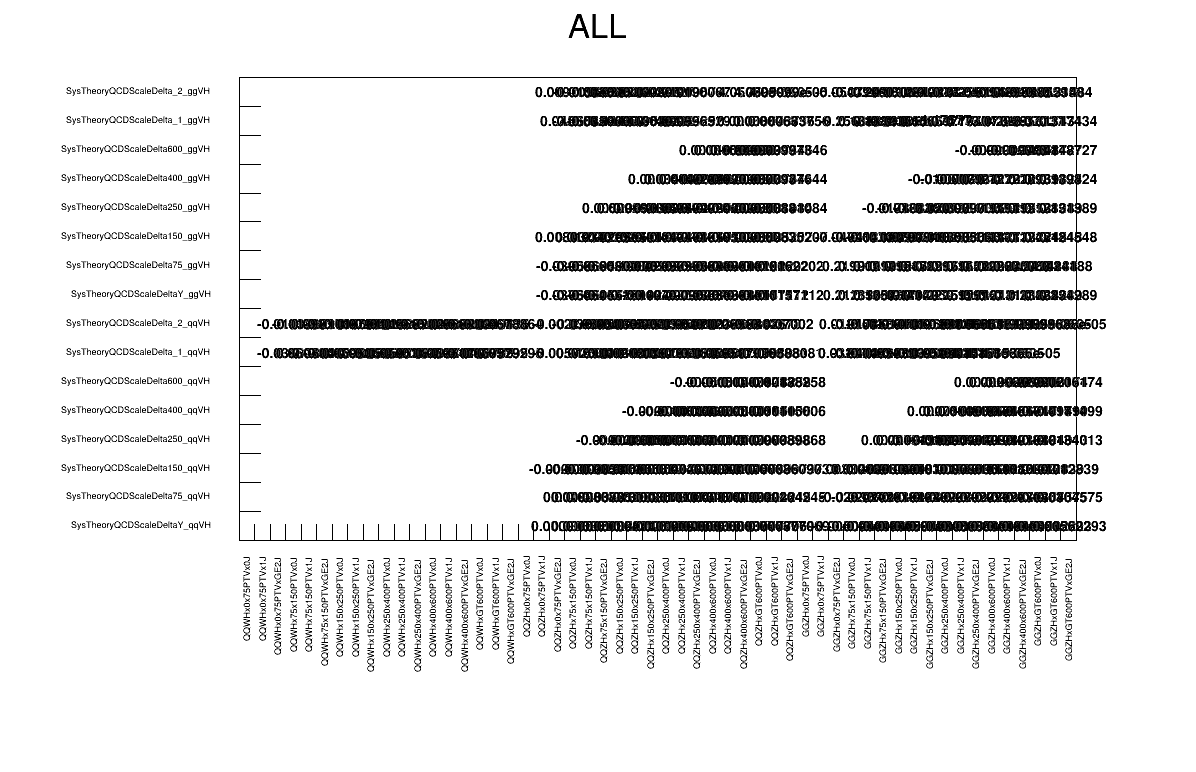

In [78]:
c2= TCanvas("c2","c2",1200,800)
c2.SetBottomMargin(0.3)
c2.SetRightMargin(-0.2)
c2.SetLeftMargin(0.2)
# h_new.SetStats(0)
h_new.GetXaxis().SetLabelSize(0.02)
h_new.GetYaxis().SetLabelSize(0.02)
h_new.Draw("TEXT")
c2.Draw()

In [79]:
def Convet2DHistToDictionary(Hist1,flag):
  Variation = collections.OrderedDict()
  nX1 = Hist1.GetXaxis().GetNbins()
  nY1 = Hist1.GetYaxis().GetNbins()
  VarNames = []
  BinNames = []
  for ix in range(nX1):
    xBinName = Hist1.GetXaxis().GetBinLabel(ix+1)
    BinNames.append(xBinName.replace('_','x'))
    truthBinVar = collections.OrderedDict()
    for iy in range(nY1):
      yBinName = Hist1.GetYaxis().GetBinLabel(iy+1)
      if flag:
        yBinName = f'SysTheoryQCDScaleDelta{yBinName}'
      if yBinName in ['Nominal','alphaSdn']: continue
      if ix == 0: VarNames.append(yBinName)
      content = Hist1.GetBinContent(ix+1,iy+1)
      if content >=1.0:
        content = 1.0 
      truthBinVar[yBinName] = content
    Variation[xBinName] = truthBinVar
  return Variation,VarNames,BinNames

In [80]:
variations, varNames, binNames = Convet2DHistToDictionary(h_new,1)

In [81]:
import csv
import pandas as pd

In [82]:
data = []
for i in range(1, h_new.GetNbinsX()+1):
    for j in range(1, h_new.GetNbinsY()+1):
        content=h_new.GetBinContent(i, j)
        if content >=1.0:
            content = 1.0
        if content <=-1.0:
            content = -1.0
        data.append({'x_bin': h_new.GetXaxis().GetBinLabel(i), 'y_bin': h_new.GetYaxis().GetBinLabel(j), 'content': "{:.2f}".format(content*100)})

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Pivot the DataFrame
df_pivot = df.pivot(index='y_bin', columns='x_bin', values='content')

In [83]:
df_pivot.to_csv('outputCheck_residuals_13POI.csv')

In [56]:
filter_list=['SysTheoryQCDScaleDelta_1_ggVH','SysTheoryQCDScaleDelta_2_ggVH','SysTheoryQCDScaleDelta_1_qqVH','SysTheoryQCDScaleDelta_2_qqVH']

In [57]:
df_filtered = df_pivot[df_pivot.index.isin(filter_list)]

In [59]:
df_filtered.to_csv('outputCheck.csv')

In [ ]:
latex_table = df_filtered.to_latex(index=False)

# Print the LaTeX table
print(latex_table)